## Magnetic Remotion Analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
plt.style.use('classic')

In [2]:
mps_positions = np.load('positions.npy')

mps_positions = np.where(mps_positions < 0, 0, mps_positions)

In [3]:
mps_positions

array([[126.        , 121.        ,  28.        ,  35.        ,
         77.        ,  59.        , 314.        , 155.        ,
        272.        ,  80.        , 127.        ,  72.        ,
         48.        , 193.        , 152.        ,  95.        ,
        132.        ,  80.        ,  64.        , 194.        ,
        236.        , 182.        , 251.        , 104.        ,
        100.        , 193.        , 180.        , 100.        ,
        139.        , 136.        , 251.        , 159.        ,
        138.        ,  16.        , 234.        ,  87.        ,
         67.        ,  39.        , 290.        , 157.        ,
        226.        ,  79.        , 361.        , 190.        ,
        254.        , 175.        ,  73.        ,  92.        ,
        141.        , 169.        , 211.        , 191.        ,
        392.        ,  35.        , 178.        ,  40.        ,
        341.        ,  87.        , 231.        ,   7.        ,
        231.        , 155.        ,  27.

In [4]:
N = np.shape(mps_positions)[0]
time = np.arange(0, N, 1)

In [5]:
magnet_position = np.array([0, 50])

distance_mp_mgnt = np.sqrt((mps_positions[:, 0] - magnet_position[0])**2+ (mps_positions[:, 1] - magnet_position[1])**2)

In [6]:
distance_mp_mgnt

array([144.62710673, 144.62710673, 144.62710465, 144.62710395,
       144.62710233, 144.62710133])

In [7]:
magnet_position = np.array([0, 50])

mps_mgnt_distances = {}

for i in range(int(np.shape(mps_positions)[1]/2)):
    mps_mgnt_distances[f'MP{i}'] = np.sqrt((mps_positions[:, i*2] - magnet_position[0])**2 + (mps_positions[:, i*2+1] - magnet_position[1])**2)

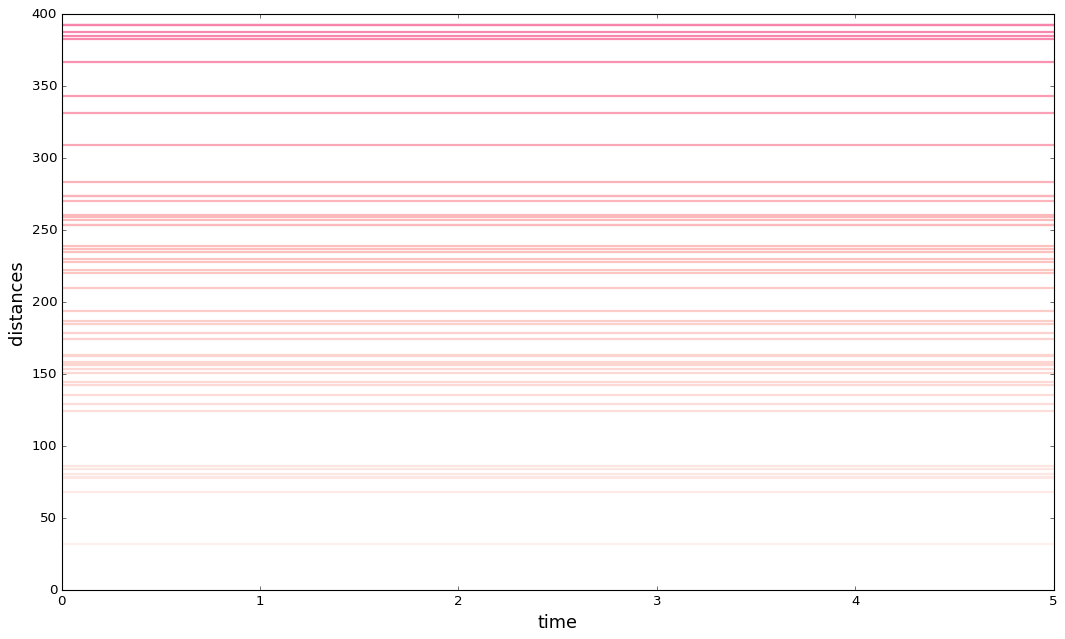

In [8]:
# Create a colormap and a normalization object
norm = Normalize(vmin=0, vmax=895)
cmap = plt.get_cmap('RdPu')  # You can choose any colormap

# Create the first set of axes on the left side
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('none')  # Set the background color to transparent
for i in mps_mgnt_distances:
    c = cmap(norm(mps_mgnt_distances[i][0]))
    ax1.plot(time[:], mps_mgnt_distances[i][:], color=c, label = f'MP{i}-Magnet', linewidth = 2)
    ax1.set_xlabel('time', size = 16)
    ax1.set_ylabel('distances', color='black', size = 16)
    ax1.tick_params('y', colors='black')

#ax1.set_xticks([])
#ax1.set_yticks([])

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
#ax1.legend(lines, labels)

#plt.savefig('magnetic_remotion_analysis.png', dpi=600)

plt.show()